<a href="https://colab.research.google.com/github/loricobbkreisman/SVHN_digit_recognition/blob/main/High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Prepared by Lori S Cobb Kreisman**
**October 6, 2025**
--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

The objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, I used a subset of the original data to save some computation time. The dataset is provided as a .h5 file. Basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Starting by mounting the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# For data cleaning and exploratory data analysis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For visualizing the data
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# For building neural network models
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential # The API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # For # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Activation
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform
# One-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # The # # Optimizers to optimize the model
from tensorflow.keras.callbacks import EarlyStopping  # For
# Regularization techniques to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img
from google.colab.patches import cv2_imshow

**Check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.19.0


## **Load the dataset**

- Load the dataset, available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
import h5py # for loading a .h5 data type

# Open the .h5 file
f = h5py.File('/content/SVHN_single_grey1.h5', 'r')

# Load the training and test data
X_train = f['X_train'][:]
y_train = f['y_train'][:]
X_test = f['X_test'][:]
y_test = f['y_test'][:]

# Close the file
f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
print("Number of images in the training dataset:", X_train.shape[0])
print("Number of images in the testing dataset:", X_test.shape[0])

Number of images in the training dataset: 42000
Number of images in the testing dataset: 18000


**Observation:**
There are 42,000 images in the training dataset, and there are 18,000 images in the testing dataset.
This works out to be a 70%/30% train/test split of the data, which is an extremely common ratio used in machine learning.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

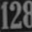

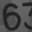

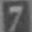

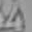

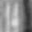

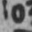

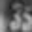

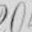

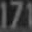

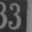

First 10 labels: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# Use X_train to visualize the first 10 images.
for i in range(10):
    cv2_imshow(X_train[i])

# Use Y_train to print the first 10 labels.
print("First 10 labels:", y_train[:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
print("Shape of the first image:", X_train[0].shape)
print("Pixel array of the first image:\n", X_train[0])

Shape of the first image: (32, 32)
Pixel array of the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalize the train and the test dataset by dividing by 255.
X_train = X_train / 255.0
X_test = X_test / 255.0

Print the shapes of Training and Test data

In [ ]:
print("New shape of training data:", X_train.shape)
print("New shape of testing data:", X_test.shape)

New shape of training data: (42000, 32, 32)
New shape of testing data: (18000, 32, 32)


### **One-hot encode output**

In [ ]:
# One-hot encode the target variable.
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

**Observation:**
The first image is 32x32. After normalizing the data, the training dataset is 48,000x32x32 and the testing dataset is 18,000x32x32.
One-hot encoding converts the catagorical data labels into binary vectors so they can be used in the output layer of the neural network. It also specifies that the output layer will have 10 classes, which is the same number as the 10 input classes for the digits 0-9.

## **Model Building**

Now that the data preprocessing is complete, build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators in NumPy and
# TensorFlow. This sets a specific starting point for the random
# number generator, so it will always produce the same sequence of
# random numbers, which makes the results reproducible. The number # 56 was chosen because it is my personal favorite number.
np.random.seed(56)
tf.random.set_seed(56)


### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

**A description of the Model_1 ANN:**

This is a sequential model, so the layers are stacked one after another.

First Hidden Layer: This layer has 64 nodes (or neurons) and uses the Rectified Linear Unit (ReLU) activation function. The input to this layer is the flattened image data, which has a shape of (1024,).

Second Hidden Layer: This layer comes after the first, has 32 nodes, and also uses the ReLU activation function.

Output Layer: This is the final layer of the network. It has 10 nodes, which is equal to the number of classes (0-9). It uses the SoftMax activation function, which is the standard for multi-class classification because it outputs a probability distribution over the classes.

The model is compiled using the categorical_crossentropy loss function, which works well for multi-class classification, the Adam optimizer with a learning rate of 0.001, and accuracy as the evaluation metric.

In [ ]:
# The general archetecture of the first ANN model, as described
# in the markdown above
def nn_model_1():
    model = Sequential()  #type of model
    model.add(Dense(64, activation='relu', input_shape=(1024,))) #hidden layer 1
    model.add(Dense(32, activation='relu')) #hidden layer 2
    model.add(Dense(10, activation='softmax')) #output layer

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Callling the nn_model_1 function and storing the model in a new
# variable
model_1 = nn_model_1()

# Printing a summary of the model
model_1.summary()

# Reshaping the training data to be 2D for the ANN model
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Fitting on the training data with a validation split of 0.2 a
# batch size = 128, verbose = 1, and epochs = 20. Storing the
# model building history.
history_1 = model_1.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,010 (265.66 KB)

 Trainable params: 68,010 (265.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.1064 - loss: 2.3033 - val_accuracy: 0.2031 - val_loss: 2.2071
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2681 - loss: 2.0864 - val_accuracy: 0.4456 - val_loss: 1.7215
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4629 - loss: 1.6516 - val_accuracy: 0.5180 - val_loss: 1.4961
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5340 - loss: 1.4616 - val_accuracy: 0.5618 - val_loss: 1.3773
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5647 - loss: 1.3692 - val_accuracy: 0.5796 - val_loss: 1.3154
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5864 - loss: 1.3138 - val_accuracy: 0.5958 - val_loss: 1.2762
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6031 - loss: 1.2736 - val_accuracy: 0.6029 - val_loss: 1.2484
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6114 - loss: 1.2435 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

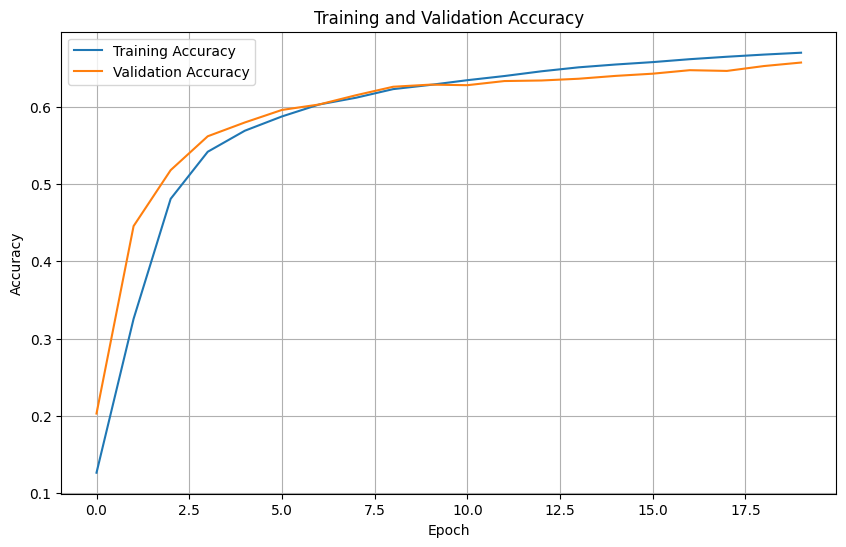

In [ ]:
# Plotting the Training and Validation Accuracies
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


**Observations:_______**

The training accuracy starts out very poor, 11.7%, but consistently increases over all 20 epochs, ultimately reaching 70.0%, which shows the model is learning and improving its performance on the data it is being trained on.

The validation accuracy also increases, beginning at 22.8% and ending at 68.5% after 20 epochs. It also follows the general trend of the training accuracy. Unfortunately, there is a pretty large gap between the training and the validation accuracy for most of the epochs, with the training accuracy consistently higher.

Overfitting: after epoch 8 the training and validation accuracies are very close to each other, which suggests that the model is performing well on the data it has seen. However, after epoch 17 they start to diverge and there is a growing gap between the training and validation accuracies, which could indicate that the model is starting to overfit the training data and its performance on the unseen data is not keeping pace with the training set. This indicates that while the model is absolutely leearning, it likely will not generalize well to new data.

Predictions from the confusion matrix:  This shows how many times each digit was predicted correctly and correctly. The rows are the actual digits in the pictures. The columns are the digit the model predicted. The boxes on the diagonal are the correct predictions - the True Positives, and we can actually see how well the model performed for predicting each digit because larger numbers here mean the model works well for identifying that specific digit. The other boxes are incorrect predictions, both false positives and false negatives, and large numbers show which number in the row it was confused with and thought it was. The model had the most difficulty discriminating between 7 & 2, 3 & 5, and 6 & 8.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the model's history from Keras
backend.clear_session()

# Setting the seed for the random number generators
np.random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

**A description of the Model_2 ANN**

This is a second, more complex Artificial Neural Network (ANN) model. It is again a sequential model, where layers are added in a linear stack.

The first hidden layer has 256 nodes and uses the ReLU activation function. The input_shape=(1024,) specifies the expected input shape, which is the flattened image data.

The second hidden layer has 128 nodes and the ReLU activation function.

A dropout layer. This layer sets 20% of the input units randomly to 0 during training. This is a regularization technique that helps prevent overfitting by reducing the dependency on specific neurons.

The third hidden layer with 64 nodes and the ReLU activation function.

The fourth hidden layer, again with 64 nodes and the ReLU activation function.

The fifth hidden layer with 32 nodes and the ReLU activation function.

A Batch Normalization layer, which normalizes the activations of the previous layer, which can help stabilize and speed up training, especially in deeper networks.

Finally, the output layer has 10 nodes (one for each digit category) and uses the SoftMax activation function to produce a probability distribution over the classes.

Compiling the model with the categorical_crossentropy loss function for multi-class classification. Also, it uses the
the Adam optimizer, with a slightly lower learning rate (0.0005) compared to the first model, which might help with finer adjustments during training.
Accuracy is the metric used to evaluate the model's performance during training and testing.

At the end, the code reshapes the training and test data and fits the model to the training data with a validation split, specified batch size, and number of epochs. The training history is stored in the history_2 variable.

In [ ]:
# The general archetecture of the second ANN model, as described
# in the markdown above
def nn_model_2():
    model = Sequential() #type of model
    model.add(Dense(256, activation='relu', input_shape=(1024,))) #hidden layer 1
    model.add(Dense(128, activation='relu')) #hidden layer 2
    model.add(Dropout(0.2)) #dropout layer
    model.add(Dense(64, activation='relu')) #hidden layer 3
    model.add(Dense(64, activation='relu')) #hidden layer 4
    model.add(Dense(32, activation='relu')) #hidden layer 5
    model.add(BatchNormalization()) #batch normalization layer
    model.add(Dense(10, activation='softmax')) #output layer

    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# Calling the nn_model_2 function and storing the model in a new
# variable.
model_2 = nn_model_2()

# Printing a summary of the model.
model_2.summary()

# Fitting on the training data with a validation split of 0.2
# batch size = 128, verbose = 1, and epochs = 30. Storing the
# model building history.
history_2 = model_2.fit(X_train_reshaped, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,250 (1.18 MB)

 Trainable params: 310,186 (1.18 MB)

 Non-trainable params: 64 (256.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0996 - loss: 2.3900 - val_accuracy: 0.1014 - val_loss: 2.3107
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1125 - loss: 2.2996 - val_accuracy: 0.1596 - val_loss: 2.2048
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2205 - loss: 2.0507 - val_accuracy: 0.3348 - val_loss: 1.8773
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4304 - loss: 1.6499 - val_accuracy: 0.5938 - val_loss: 1.3050
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5576 - loss: 1.3470 - val_accuracy: 0.6207 - val_loss: 1.1727
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6104 - loss: 1.2074 - val_accuracy: 0.6644 - val_loss: 1.0786
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6413 - loss: 1.1198 - val_accuracy: 0.6732 - val_loss: 1.0408
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6589 - loss: 1.0616 - val_accuracy: 0

### **Plot the Training and Validation Accuracies and write down your Observations.**

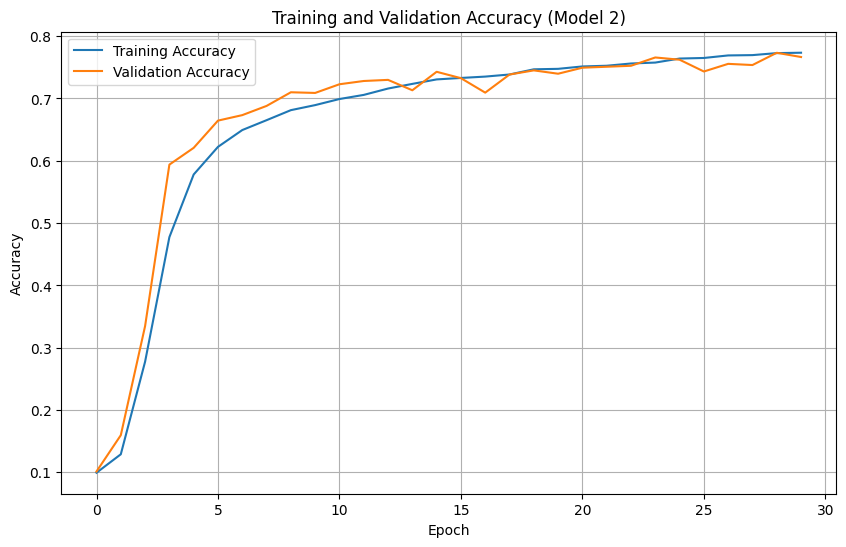

In [ ]:
# Plotting the Training and Validation Accuracies
plt.figure(figsize=(10, 6))
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:_______**

Training Accuracy: The training accuracy increases steadily over the 30 epochs, reaching a higher final accuracy than Model 1 of 77.1%. Therefore it is likely that the more-complex model has a greater capacity to learn from the training data than the simplier model 1.

Validation Accuracy: The validation accuracy also shows a consistent upward trend. While the test data takes longer to converge with the training data (epoch 13) as compared to model 1 (epoch 8), and there is still a gap between training and validation accuracy, it appears to be smaller and more stable than in the first model, especially in the later epochs because the two plots stay very close together for quite a long time.

Overfitting: There is a smaller and more consistent gap between the training and validation accuracy for much of the model runtime. This suggests that the added regularization techniques, the dropout and batch normalization, have helped to mitigate overfitting compared to the first model. The model will likely generalize better to unseen data.

Learning Rate: The slightly lower learning rate used in Model 2 might also contribute to a more stable training process and better convergence. This could be tested in a later model.

Overall Improvement: Compared to the Model_1, the Model_2 with its much more complex architecture, including regularization through dropout and batch normalization, shows improved accuracy on both the training and validation sets.

In summary, Model_2 performs better than Model_1. It achieves a higher accuracy and shows fewer signs of overfitting on the validation set. The added complexity of the model archetecture with 5 hidden layers and added regularization techniques seems to have been very helpful.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Making predictions on the test set using the second model.
y_pred_2 = model_2.predict(X_test_reshaped)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
# Displaying the first 5 predictions
# These are the data obtained when the dataset is run through the
# Model_2 artificial neural network model. It is predicting what
# digit is in each photo, and the neural network model is
# assessing how accurate that prediction is.
display(y_pred_2[:5])

array([[2.63340384e-01, 7.84382522e-02, 2.12625608e-01, 5.19602783e-02,
        1.42914066e-02, 4.99504358e-02, 5.57952076e-02, 2.35010609e-02,
        1.09200515e-01, 1.40896797e-01],
       [6.88124856e-05, 1.90937379e-03, 4.08091582e-02, 4.95276712e-02,
        7.19554882e-05, 4.28818725e-03, 5.92029747e-03, 8.95568967e-01,
        1.05907361e-03, 7.76534085e-04],
       [8.34934181e-05, 1.26620021e-03, 9.94533777e-01, 7.81399372e-04,
        6.74422772e-04, 1.60204800e-05, 3.63866966e-05, 1.76922127e-03,
        5.26522403e-04, 3.12570948e-04],
       [3.65012493e-05, 8.68398911e-06, 4.30259888e-06, 1.37811213e-07,
        1.68520546e-05, 7.06368297e-08, 4.09236122e-07, 3.73737817e-06,
        2.42569968e-06, 9.99926925e-01],
       [9.97904658e-01, 6.30219220e-05, 1.26441973e-05, 1.56118476e-05,
        9.42068145e-05, 2.97980614e-06, 1.28705666e-04, 4.01485486e-05,
        4.15196206e-04, 1.32292754e-03]], dtype=float32)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting y_test_encoded from one-hot encoded to single labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1814
           1       0.71      0.82      0.76      1828
           2       0.84      0.75      0.79      1803
           3       0.73      0.72      0.73      1719
           4       0.76      0.83      0.79      1812
           5       0.76      0.71      0.74      1768
           6       0.77      0.76      0.76      1832
           7       0.76      0.84      0.80      1808
           8       0.81      0.67      0.74      1812
           9       0.76      0.75      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.77     18000
weighted avg       0.77      0.77      0.77     18000



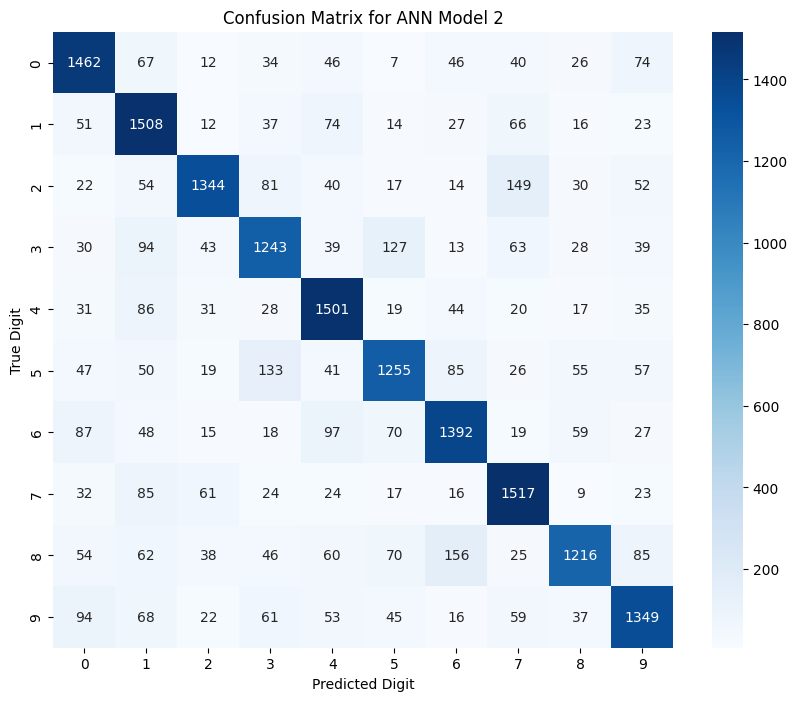

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Making a classification report
print(classification_report(y_test_classes, np.argmax(y_pred_2, axis=1)))

# Calculating the confusion matrix
conf_matrix_2 = confusion_matrix(y_test_classes, np.argmax(y_pred_2, axis=1))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.title('Confusion Matrix for ANN Model 2')
plt.show()

**Final Observations:__________**

Classification Report: The classification report provides predictions for each digit class 0 through 9 being studied and overall averages. The ANN Model_2 was used for these predictions as it is the more robust model of the two so far studied.

Precision: A high precision means fewer false positives. For each class, this tells how many of the instances predicted as that class actually belonged to that class. The precision for the detection of each digit is different, ranging from 68-84%, with an overall average of 77% precise.

Recall: This is the measure of sensitivity. A high recall means fewer false negatives. For each class, this tells how many of the actual instances of that class were correctly identified by the model. The sensitivity for the detection of each digit is also different, ranging from 66-87%, with an overall average sensitivity of 76%.

Predictions from the confusion matrix: The confusion matrix summarizes the data in the classification report. It shows how many times each digit was predicted correctly and incorrectly. The rows are the actual digits in the pictures. The columns are the digit the model predicted. The boxes on the diagonal are the correct predictions - the True Positives, and we can actually see how well the model performed for predicting each digit because larger numbers here mean the model works well for identifying that specific digit. The other boxes are incorrect predictions, both false positives and false negatives, and large numbers show which number in the row it was confused with and thought it was. Model_2 often misidentifies 5 as a 3. Secondarily, is sometimes confuses 2 & 7 and 7 & 1. It does not have much difficulty with most of the other digit combinations, to varying degrees.

In summary, Model_2 is a fairly good model. It is not overfitting the test data and it is pretty good at frequently identifying the correct digit. However, it certainly would be highly desirable if the accuracy and the precision were both higher, as 76-77% is really not good enough to be used professionally.


In [ ]:
# Clearing the previous model's history from keras
backend.clear_session()

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import h5py # for loading a .h5 data type

# Opening the .h5 file
f = h5py.File('/content/SVHN_single_grey1.h5', 'r')

# Loading the training and test data
X_train = f['X_train'][:]
y_train = f['y_train'][:]
X_test = f['X_test'][:]
y_test = f['y_test'][:]

# Closeing the file
f.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check the number of images in the training and the testing dataset.

In [ ]:
print("Number of images in the training dataset:", X_train.shape[0])
print("Number of images in the testing dataset:", X_test.shape[0])

Number of images in the training dataset: 42000
Number of images in the testing dataset: 18000


**Observation:**


The dataset is the same as used before. The training set has 42,000 images and the testing set has 18,000 images. This is a 70:30 ratio split, which means that of the total 60,000 images in the dataset, 70% will be used for training the model and 30% will be used for testing the model.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Printing the shape and the array for the first image in the training dataset.
print("Shape of the first image:", X_train[0].shape)
print("Pixel array of the first image:\n", X_train[0])

Shape of the first image: (32, 32)
Pixel array of the first image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the train and the test datasets to give a 4D array as input to the CNN.
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing inputs from 0-255 to 0-1 by dividing.
X_train = X_train / 255.0
X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
print("New shape of training data:", X_train.shape)
print("New shape of testing data:", X_test.shape)

New shape of training data: (42000, 32, 32, 1)
New shape of testing data: (18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encode the labels in the target variable y_train and y_test.
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

**Observation:**

The first image is 32x32. After normalizing the data, the training dataset is 48,000x32x32x1 and the testing dataset is 18,000x32x32x1. This is exactly the same procedure and results as the data preparation steps used for creating the ANNs, with the exception of the added dimension during reshaping to make it 4D. One-hot encoding converts the catagorical data labels into binary vectors so they can be used in the output layer of the neural network. It also specifies that the output layer will have 10 classes, which is the same number as the 10 input classes for the digits 0-9.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fix the seed for random number generators. 56 was chosen because it's my
# favorite number.
np.random.seed(56)
tf.random.set_seed(56)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

**Description of the Model_1 CNN:**

CNNs are particularly well-suited for image data because they can automatically learn spatial hierarchies of features. Here is the structure of the first CNN model by layers:

First Convolutional Layer: This layer will have 16 filters. Each filter is a small matrix with a kernel size of 3x3 that slides over the input image to detect features like edges or corners. 'Same' padding means the output feature map will have the same spatial dimensions as the input after convolution. The input images are 32x32 pixels with 1 grayscale channel.

First activation function layer: Leaky ReLU is used to allow a small gradient when the input is negative, which can help prevent the "dying ReLU" problem when neuron inputs are zero. The slope equal to 0.1 determines this small gradient.

Second Convolutional Layer: 32 filters and a 3x3 kernel size, again using 'same' padding. This layer will learn more complex features based on the output of the first convolutional layer.

Second activation function layer: Another Leaky ReLU activation function with a slope of 0.1.

Max-Pooling Layer: This layer reduces the height and width of the feature maps while keeping the most important information. A pool size of 2x2 means it takes the maximum value from each 2x2 block. This helps to reduce computations while allowing the model to still be robust to small variations in the input.

Flatten Layer: This layer converts the 2D feature maps from the previous layer into a 1D vector. This is needed to connect the convolutional part of the network to the fully connected layers.

Dense Layer: A fully connected layer with 32 nodes. This layer will classify the flattened features.

Fully-connected activation function layer: Also using leaky ReLU with a slope of 0.1.

Output Layer: The final dense layer with 10 nodes for the 10 digit classes, and the SoftMax activation function to output the class probabilities.

The model will be compiled with categorical_crossentropy loss, the Adam optimizer with a learning rate of 0.001, and accuracy as the metric.

In [ ]:
# The general archetecture of the first CNN model, as described in
# the markdown above.
def cnn_model_1():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1))) # Convolutional layer 1
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same')) # Convolutional layer 2
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling
    model.add(Flatten()) # Converts to 1D vector
    model.add(Dense(32)) # Changes back to fully-connected NN
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(Dense(10, activation='softmax')) # Output layer

    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Calling the function cnn_model_1 and storing the output in a new
# variable.
model_cnn_1 = cnn_model_1()

# Printing a summary of the model.
model_cnn_1.summary()

# Fitting the model on the training data with a validation split
# of 0.2, batch size = 32, verbose = 1, and epochs = 20. Storing
# the model building history.
history_cnn_1 = model_cnn_1.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=32, verbose=1, epochs=20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,306 (1.02 MB)

 Trainable params: 267,306 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4719 - loss: 1.5327 - val_accuracy: 0.8201 - val_loss: 0.6407
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8323 - loss: 0.5775 - val_accuracy: 0.8525 - val_loss: 0.5355
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8636 - loss: 0.4702 - val_accuracy: 0.8589 - val_loss: 0.5149
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8826 - loss: 0.4023 - val_accuracy: 0.8593 - val_loss: 0.5097
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8968 - loss: 0.3536 - val_accuracy: 0.8607 - val_loss: 0.5083
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9076 - loss: 0.3153 - val_accuracy: 0.8608 - val_loss: 0.5227
Epoch 7/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9186 - loss: 0.2791 - val_accuracy: 0.8613 - val_loss: 0.5379
Epoch 8/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9294 - loss: 0.2479 - 

### **Plot the Training and Validation Accuracies and Write your observations.**

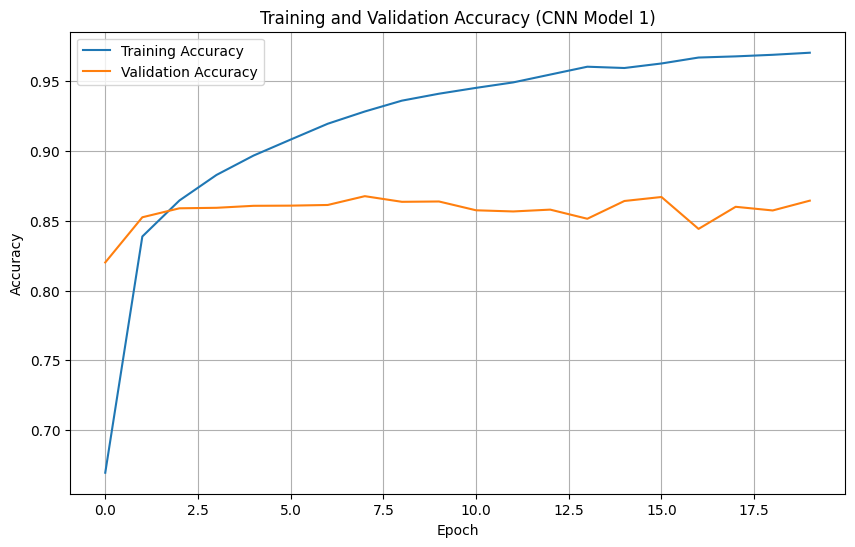

In [ ]:
# Plotting the Training and Validation Accuracies
plt.figure(figsize=(10, 6))
plt.plot(history_cnn_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (CNN Model 1)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:__________**

The training accuracy initially increases rapidly in the first 1.5 epochs, and then continues to increase in a more gradual pattern throughout the training, finally reaching as high as 97.2%. This indicates that the model is learning from the training data very efficiently .

Initially the validation accuracy begins with a unexpectedly high accuracy of 79%. It also increases, but only by a small amount, and by epoch 3 it is at 84%. However, after this point the validation accuracy plateaus at approximately 86%, or even slightly decreases, while the training accuracy continues to rise significantly.

There is an extremely large gap between the training accuracy and the validation accuracy, after the training accuracy crosses over the validation accuracy at the unexpectedly early epoch 2. This is a clear sign of overfitting, and a model that is deficient and not at all usable. The model is far too specific to the training data and is not generalizing well to unseen data, the validation testing set. Therefore, it will not be useful to use as a model for unknown data in the future.

In summary, the first CNN model learns quickly but starts to overfit the training data extremely early in the training process, which hinders its ability to perform well on new, previously unseen images. It is not useful in its current form as a functional model for this dataset.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the previous model's history from keras
backend.clear_session()

# Setting the seed for the random number generators
np.random.seed(56)
tf.random.set_seed(56)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

**A discription of the Model_2 CNN:**

The second convolutional neural network model builds off of the first but adds even more layers and some methods for regularization.

First Convolutional Layer: 16 filters, 3x3 kernel, 'same' padding, input shape (32, 32, 1).

First activation function: Leaky ReLU

Second Convolutional Layer: 32 filters, 3x3 kernel, 'same' padding.

Second activation function: Again leaky ReLU

Max-Pooling Layer: 2x2 pool size. Reduces the spatial dimensions of the layer.

Batch Normalization Layer: This is new. It normalizes the activations of the previous layer, which can stabilize the training and improve performance, especially in deeper networks.

Third Convolutional Layer: 32 filters, 3x3 kernel, 'same' padding. Another convolutional layer to extract more features.

Third activation function: Leaky ReLU.

Fourth Convolutional Layer: 64 filters, 3x3 kernel, 'same' padding. This doubles the number of filters to learn even more complex patterns.

Fourth activation function: Leaky ReLU.

Second Max-Pooling Layer: 2x2 pool size. This reduces again the spatial dimensions of the layer, since they were doubled in the fourth convolutional layer.

Batch Normalization Layer: For stabilization.

Flatten Layer: Converts the 2D feature maps into a 1D vector.

Dense Layer: A fully connected layer with 32 nodes, with input of 32 1D vectors.

Fully-connectd activation function layer: Leaky ReLU.

Dropout Layer: With a rate of 0.5, this regularization technique randomly sets 50% of the input units to 0 during training to prevent overfitting.

Output Layer: 10 nodes using the SoftMax activation function for the 10 digit classes.

This model is compiled with categorical_crossentropy loss, the Adam optimizer with a learning rate of 0.001, and accuracy as the metric.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# The second CNN model, using the architecture described in the
# markdown above.

def cnn_model_2():
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 1))) # Convolutional layer 1
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same')) # Convolutional layer 2
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling
    model.add(BatchNormalization()) # Regularization
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same')) # Convolutional layer 3
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same')) # Convolutional layer 4
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(MaxPooling2D(pool_size=(2, 2))) # Pooling
    model.add(BatchNormalization()) # Regularization
    model.add(Flatten()) # Converts to 1D vector
    model.add(Dense(32)) # Changes back to fully-connected NN
    model.add(LeakyReLU(alpha=0.1)) # Activation function
    model.add(Dropout(0.5)) # Regularization, prevents overfitting
    model.add(Dense(10, activation='softmax')) # Output layer

    # Compiling the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Calling the function cnn_model_2 and storing the model in a new variable.
model_cnn_2 = cnn_model_2()

# Printing the summary of the model.
model_cnn_2.summary()

# Fitting the model on the training data with a validation split
# of 0.2, batch size = 128, verbose = 1, and epochs = 30.
history_cnn_2 = model_cnn_2.fit(X_train, y_train_encoded, validation_split=0.2, batch_size=128, verbose=1, epochs=30)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,362 (642.04 KB)

 Trainable params: 164,170 (641.29 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.3408 - loss: 1.8877 - val_accuracy: 0.2157 - val_loss: 2.0990
Epoch 2/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7764 - loss: 0.7093 - val_accuracy: 0.8245 - val_loss: 0.5981
Epoch 3/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8314 - loss: 0.5568 - val_accuracy: 0.8581 - val_loss: 0.4835
Epoch 4/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8474 - loss: 0.4897 - val_accuracy: 0.8767 - val_loss: 0.4205
Epoch 5/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8652 - loss: 0.4432 - val_accuracy: 0.8542 - val_loss: 0.4896
Epoch 6/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8743 - loss: 0.4104 - val_accuracy: 0.8962 - val_loss: 0.3708
Epoch 7/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8885 - loss: 0.3640 - val_accuracy: 0.8795 - val_loss: 0.4243
Epoch 8/30
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8923 - loss: 0.3576 - val_accuracy:

### **Plot the Training and Validation accuracies and write your observations.**

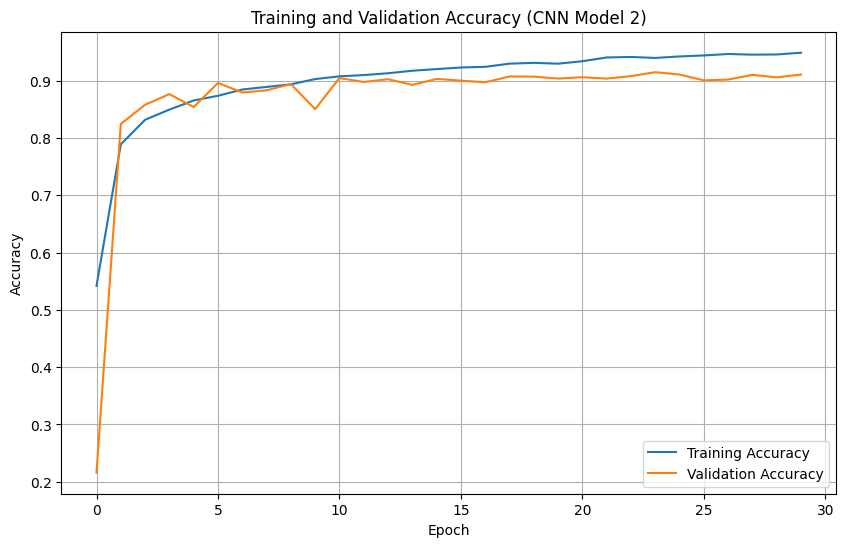

In [ ]:
# Plotting the Training and Validation Accuracies
plt.figure(figsize=(10, 6))
plt.plot(history_cnn_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (CNN Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Observations:________**

The second CNN model uses the first model as a starting point, but it has an increased depth, additional convolutional layers, and the inclusion of Batch Normalization and Dropout layers. These additions are intended to improve the model's ability to both learn complex patterns and generalize better to unseen data compared to the first CNN model.

The results are quite different as compared to the first CNN model.
The testing accuract begins at an unusually high 34% and rapidly climbs to 83% by epoch 3. It then steadly climbs further, and actually never stops climbing throughout all 30 epochs. This indicates that the model as designed is already somewhat specific to the training data, learns quickly, and continues to learn more with every iteration. By epoch 30 it reaches an accuracy of 95%.

The validation accuracy, on the other hand, starts out very low which indicates the model is in no way specific to the testing data, which is highly desirable. However, the accuracy very rapidly climbs to be just as accurate as the training data by epoch 3, which can be seen in the plot by the line for the validation accuracy crossing over the testing accuracy. The validation accuracy actually goes higher than the testing accuracy for a couple epochs, and there is a gap between the two which is worrysome, but

**Observations:________**

The second CNN model uses the first model as a starting point, but it has an increased depth, additional convolutional layers, and the inclusion of batch normalization and dropout layers for regularization. These additions are intended to improve the model's ability to both learn complex patterns and generalize better to unseen data, as compared to the first CNN model.

The subsequent results are quite different when compared to the first CNN model.
Training Accuracy: The training accuracy begins at an unusually high 34% and rapidly climbs to 83% by epoch 3. It then steadily climbs further, and actually never stops climbing throughout all 30 epochs. This indicates that the model as designed is already somewhat specific to the training data, learns quickly, and continues to learn more with every iteration, reaching an accuracy of around 95% by epoch 30. This shows the model is effectively learning from the data it's trained on.

Validation Accuracy: The validation accuracy, on the other hand, starts out very low, around 21%, which indicates the model is in no way specific to the testing data, which is highly desirable initially. However, the accuracy very rapidly climbs to be just as accurate as the training data by epoch 3, which can be seen in the plot by the line for the validation accuracy crossing over the testing accuracy. The validation accuracy then continues to increase and generally stays relatively close to the training accuracy for a significant portion of the training process, fluctuating between approximately 85% and 91%. This suggests that the model is generalizing reasonably well to unseen data, especially when compared to the first CNN model.

Overfitting: While there is still a gap between the training and validation accuracy, especially in the later epochs where the training accuracy is consistently higher, the gap is much smaller and more stable than in the first CNN model. The validation accuracy also does not drop significantly in the later epochs, which indicates that the batch normalization and dropout layers have helped to mitigate overfitting. This means that the model is not becoming overly specialized to the training data and is therefore useful as a model for unknown data.

In summary, the plot shows that the second CNN model is learning effectively and generalizing much better to unseen data than the first CNN model. The training and validation accuracies follow similar trends for longer, without showing signs of overfitting, and the final validation accuracy is significantly higher than that of the first CNN model. This indicates that the added complexity and regularization techniques were beneficial.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Predictions on the test set using CNN Model_2.
y_pred_cnn_2 = model_cnn_2.predict(X_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting y_test_encoded from one-hot encoded to single labels
y_test_classes = np.argmax(y_test_encoded, axis=1)

In [ ]:
from sklearn.metrics import classification_report

# Making predictions on the test data and converting to class labels
y_pred_cnn_2_classes = np.argmax(y_pred_cnn_2, axis=1)

# Displaying the classification report
print(classification_report(y_test_classes, y_pred_cnn_2_classes))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1814
           1       0.88      0.92      0.90      1828
           2       0.91      0.93      0.92      1803
           3       0.86      0.89      0.88      1719
           4       0.92      0.93      0.92      1812
           5       0.91      0.90      0.90      1768
           6       0.92      0.88      0.90      1832
           7       0.95      0.91      0.93      1808
           8       0.89      0.91      0.90      1812
           9       0.91      0.89      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



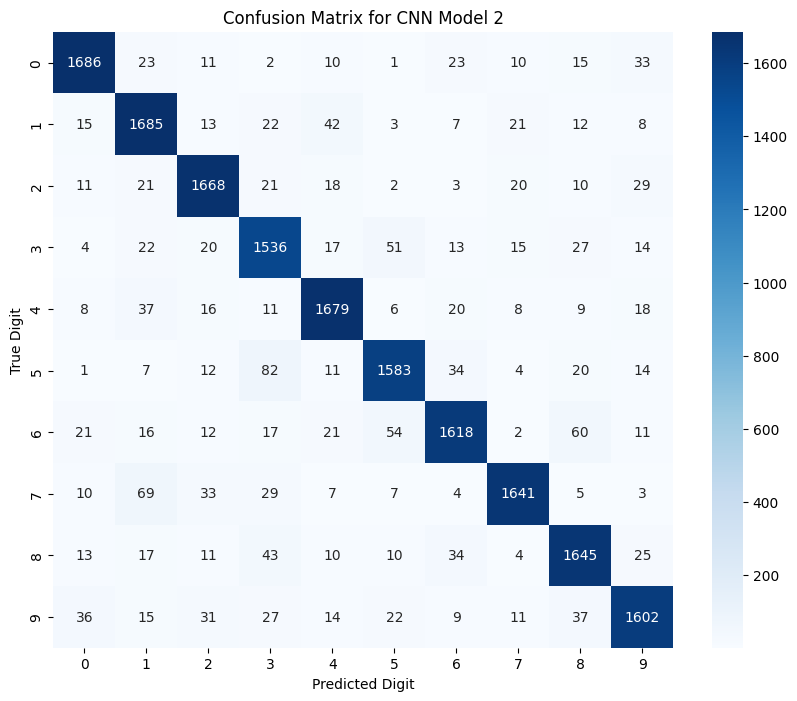

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the confusion matrix for CNN Model_2
conf_matrix_cnn_2 = confusion_matrix(y_test_classes, y_pred_cnn_2_classes)

# Plotting the confusion matrix for CNN Model_2
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn_2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.title('Confusion Matrix for CNN Model 2')
plt.show()

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**

Classification Report: The classification report shows that the CNN Model_2 achieved an overall accuracy of 91% on the testing dataset. The model generally performs well across all the digits tested, with precision, recall, and f1-scores mostly in the high 80s and low 90s. Some digits, such as 0, 2, 4, and 7, have both particularly high precision and recall, suggesting the model is very good at identifying these digits. Digits like '1' and '3' have slightly lower recall or precision, indicating areas where the model could still be further improved.

Confusion Matrix: The confusion matrix is a visual representation of the numeral data presented in the classification report. It confirms the high accuracy of the CNN model along the diagonal, where the true digit matches the predicted digit. The off-diagonal squares show where the model made errors. There are still some instances where 3 is still misidentified as 5, and vice versa, although to a much lesser extent than in the ANN model_2. The confusion between 1 and 7 is also still present, as is the confusion between 6 and 8. However, overall, the confusion matrix demonstrates that the CNN model_2 is much better at distinguishing between digits compared to the ANN model_2, with many fewer off-diagonal values.

Comparison to ANN Model 2: The CNN Model 2 significantly outperforms ANN Model 2. The overall accuracy of 91% for the CNN model is a substantial improvement over the 77% accuracy of the ANN model_2. The in-class precision, recall, and f1-scores are also much higher for the CNN model_2, which indicates significantely improved performance across all the digits trained on the model. The confusion matrix for the CNN model_2 shows fewer and less severe misclassifications compared to the ANN model_2. The regularization techniques of batch normalization and dropout, and the underlying ability of CNNs to natively handle image data well, have clearly contributed to this improved performance and better generalization on previously unseen data.

This model is most likely good enough to be deployed in some form of commercial context. If there is time it would certainly be desirable to continue to play with parameters to attempt to improve it even further. However, eventually one reaches a point where further improvements become marginal.